#  Exploratory Data Analysis ENEM 2019

# 1) Introduction

ENEM in loose translation means National Exam of High School. It is the principal way to enter a university in all Brazilian territory. This analysis is meant to discover if ethnicity, household income, age, type of school (private or public), access to internet and other aspects can be related to the final grade of the students

In [2]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
plt.style.use('seaborn-colorblind')

In [4]:
#Verify which archives are present in the zip file and choose the database .csv to work in
with zipfile.ZipFile('../ProjetoFinal/microdados_enem_2019.zip') as z:
    print(*z.namelist(),sep="\n")

LEIA-ME E DOCUMENTOS TÉCNICOS/
LEIA-ME E DOCUMENTOS TÉCNICOS/matriz_referencia_enem.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_enem_2019.pdf
PROVAS E GABARITOS/
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_03_DIA_1_BRANCO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_04_DIA_1_ROSA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_09_DIA_1_LARANJA_LEDOR.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_10_DIA_1_VERDE_LIBRAS.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_05_DIA_2_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO.pdf.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_03_D

In [5]:
#read the archive “microdados_enem_2019.zip” 
with zipfile.ZipFile('../ProjetoFinal/microdados_enem_2019.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as d:
        dadosEnem = pd.read_csv(d,sep=';',encoding='ISO-8859-1')

In [5]:
#visualize the first lines of the table
dadosEnem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


In [11]:
#visualize all the columns
dadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [6]:
# Select relevant data, which are: ‘state of residence’, ‘age’, ‘gender’, ‘ethnicity’, ‘grade in nature sciences’, 
#‘grade in human sciences’, ‘grade in languages, codes and their technologies’, ‘grade in mathematics’, ‘type of school’, 
#‘mother's schooling‘,  ‘access to internet’, ‘household income’, , ‘presence in human sciences test’, 
#‘presence in mathematics’. 

dadosRelevantes = dadosEnem[['SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT','NU_NOTA_REDACAO','TP_ESCOLA','Q025','Q006','Q002', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT']]
dadosRelevantes.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESCOLA,Q025,Q006,Q002,TP_PRESENCA_CH,TP_PRESENCA_MT
0,SP,36.0,M,3,NaN,NaN,NaN,NaN,NaN,1,B,A,B,0,0
1,BA,23.0,M,1,NaN,NaN,NaN,NaN,NaN,1,B,C,E,0,0
2,CE,39.0,F,3,NaN,NaN,NaN,NaN,NaN,1,B,B,E,0,0
3,TO,25.0,F,1,483.8,503.6,537.3,392.0,460.0,1,B,E,E,1,1
4,MG,22.0,F,1,513.6,575.5,570.7,677.0,860.0,1,B,G,E,1,1


In [14]:
#save this table with only relevant data in a .csv archive
dadosRelevantes.to_csv('dados_relevantes.csv')

In [3]:
#read the archive and work with it from now on because it is lighter than the original.
maindata=pd.read_csv('dados_relevantes.csv')

In [16]:
#verify if the new table is correct
maindata.head()

,Unnamed: 0,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESCOLA,Q025,Q006,Q002,TP_PRESENCA_CH,TP_PRESENCA_MT
0,0,SP,36.0,M,3,NaN,NaN,NaN,NaN,NaN,1,B,A,B,0,0
1,1,BA,23.0,M,1,NaN,NaN,NaN,NaN,NaN,1,B,C,E,0,0
2,2,CE,39.0,F,3,NaN,NaN,NaN,NaN,NaN,1,B,B,E,0,0
3,3,TO,25.0,F,1,483.8,503.6,537.3,392.0,460.0,1,B,E,E,1,1
4,4,MG,22.0,F,1,513.6,575.5,570.7,677.0,860.0,1,B,G,E,1,1


# 2) Data Analysis 

In [6]:
#knowing the nature of the variables
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES: ')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
    
show_info(maindata)

DATASET SHAPE:  (5095270, 16) 

--------------------------------------------------
FEATURE DATA TYPES: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   SG_UF_RESIDENCIA  object 
 2   NU_IDADE          float64
 3   TP_SEXO           object 
 4   TP_COR_RACA       int64  
 5   NU_NOTA_CN        float64
 6   NU_NOTA_CH        float64
 7   NU_NOTA_LC        float64
 8   NU_NOTA_MT        float64
 9   NU_NOTA_REDACAO   float64
 10  TP_ESCOLA         int64  
 11  Q025              object 
 12  Q006              object 
 13  Q002              object 
 14  TP_PRESENCA_CH    int64  
 15  TP_PRESENCA_MT    int64  
dtypes: float64(6), int64(5), object(5)
memory usage: 622.0+ MB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

Unnamed: 0          5095270
SG_UF_RESIDENCIA         27
NU_IDADE

In [5]:
#How many people registered for the test
inscricoes = len(maindata)
print ('ENEM 2019 has received '+ str(inscricoes) +' registrations')

ENEM 2019 has received 5095270 registrations


In [7]:
#Assigning labels to variables

#Ethnicity
maindata['TP_COR_RACA'] = maindata['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'White', 2:'Black', 3:'Brown',4:'Yellow', 5:'Indigenous'})

#Access to internet
maindata['Q025'] = maindata['Q025'].map({'A':'No', 'B':'Yes'})

#Mother's schooling
maindata['Q002'] = maindata['Q002'].map({'A':'Never studied', 'B':'Did not complete elementary school', 'C':'Did not complete elementary school',
                                'D':'Did not complete high school', 'E':'Did not complete college', 'F':'graduated',
                                'G':'Post graduate','H':'Dont know'})

#Familiar income
maindata['Q006'] = maindata['Q006'].map({'A':'None', 'B':'Until 1.320', 'C':'Until 1.320',
                                 'D':'Until 3.520', 'E':'Until 3.520', 'F':'Until 3.520', 'G':'Until 3.520',
                                 'H':'Until 10.560','I':'Until 10.560', 'J':'Until 10.560','K':'Until 10.560',
                                 'L':'Until 10.560','M':'Until 10.560','N':'Until 10.560',
                                 'O':'More than 10.560','P':'More than 10.560','Q':'More than 10.560'})

#Type of school
maindata['TP_ESCOLA'] = maindata['TP_ESCOLA'].map({1:'Do not answer', 2:'Public', 3:'Private', 4:'Abroad'})

#Presence in Human Science test
maindata['TP_PRESENCA_CH'] = maindata['TP_PRESENCA_CH'].map({0:'Did not attend the test', 1:'Attend the test', 2:'Eliminated'})

#Presence in Math test
maindata['TP_PRESENCA_MT'] = maindata['TP_PRESENCA_MT'].map({0:'Did not attend the test', 1:'Attend the test', 2:'Eliminated'})


In [8]:
# The first day are applied tests of Essay, Human Science and Languages and Codes
# For this reason, it is necessary read only one of the data mentioned, in this case: human science

print('Percentage of students present on the first day of ENEM 2019 ')
maindata['TP_PRESENCA_CH'].value_counts(normalize=True)

Percentage of students present on the first day of ENEM 2019 


Attend the test            0.769958
Did not attend the test    0.229243
Eliminated                 0.000799
Name: TP_PRESENCA_CH, dtype: float64

In [9]:
#The first day are applied tests of Maths and Nature Sciences
#For this reason, it is necessary read only one of the data mentioned, in this case: math

print('Percentage of students present on the second day of ENEM 2019')
maindata['TP_PRESENCA_MT'].value_counts(normalize=True)

Percentage of students present on the second day of ENEM 2019


Attend the test            0.728211
Did not attend the test    0.271413
Eliminated                 0.000375
Name: TP_PRESENCA_MT, dtype: float64

In [17]:
#Gender percentage
maindata['TP_SEXO'].value_counts(normalize=True)

F    0.595027
M    0.404973
Name: TP_SEXO, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


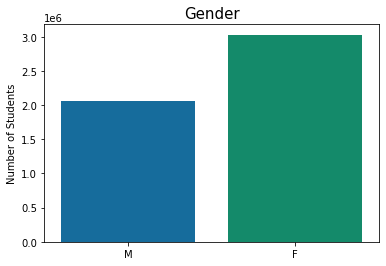

In [12]:
#Graphic: gender x number of students
sns.countplot(maindata['TP_SEXO'], orient='h')
plt.title('Gender', size=15)
plt.xlabel("")
plt.ylabel("Number of Students")
plt.show()

In [13]:
#Number of students per state

print('Number of students per state')
maindata['SG_UF_RESIDENCIA'].value_counts()

Number of students per state


SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

In [14]:
#Percentage of students per state

print('Percentage of students per state')
maindata['SG_UF_RESIDENCIA'].value_counts(normalize=True)

Percentage of students per state


SP    0.159711
MG    0.105764
BA    0.078130
RJ    0.066475
CE    0.058068
PA    0.055251
PE    0.053329
MA    0.043113
RS    0.042935
PR    0.041230
GO    0.033393
PB    0.029003
PI    0.023783
RN    0.023390
AM    0.023176
SC    0.021493
ES    0.020104
DF    0.018518
AL    0.017998
MT    0.017339
SE    0.014895
MS    0.013769
RO    0.011557
TO    0.009260
AP    0.008270
AC    0.007503
RR    0.002541
Name: SG_UF_RESIDENCIA, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


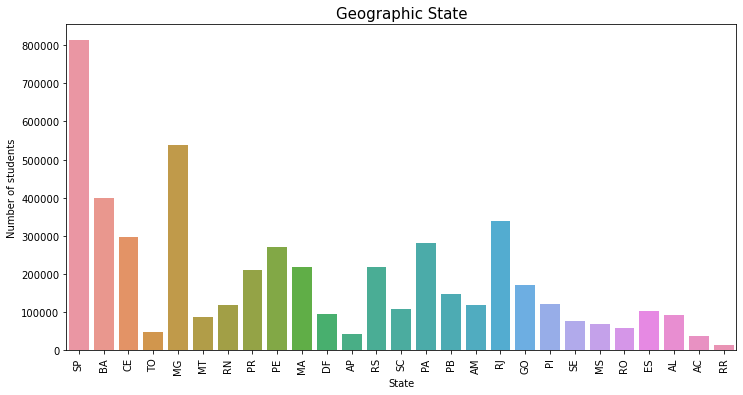

In [15]:
# Graphic: number of students X geographic state
plt.figure( figsize=(12, 6))
sns.countplot(maindata['SG_UF_RESIDENCIA'], orient='h')
plt.title('Geographic State', size=15)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Number of students")
plt.show()

In [16]:
#Number of students per ethnicity
print("Number of students per ethnicity:")
maindata['TP_COR_RACA'].value_counts()

Number of students per ethnicity:


Brown         2364063
White         1831779
Black          648309
Yellow         116162
NA             103201
Indigenous      31756
Name: TP_COR_RACA, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


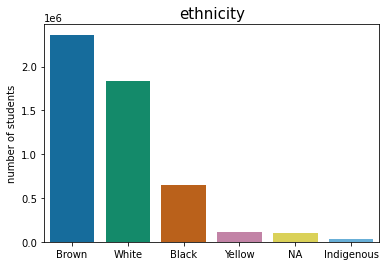

In [17]:
#Graphic: number of students per ethnicity
sns.countplot(maindata['TP_COR_RACA'], orient='h')
plt.title('ethnicity', size=15)
plt.xlabel("")
plt.ylabel("number of students")
plt.show()

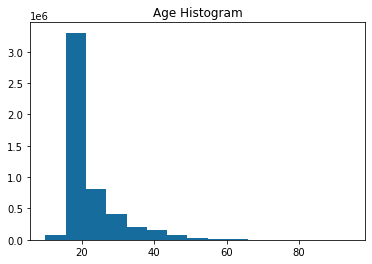

In [18]:
#Age histogram
plt.hist(maindata['NU_IDADE'],bins=15, histtype='bar', color='#166C9C')
plt.title('Age Histogram')
plt.show()

In [19]:
#Number of students and the type of school
print("Type of school")
maindata['TP_ESCOLA'].value_counts()

Type of school


Do not answer    3629376
Public           1247262
Private           218632
Name: TP_ESCOLA, dtype: int64

In [20]:
#Percentage of students and the type of school
print("Type of school")
maindata['TP_ESCOLA'].value_counts(normalize=True)

Type of school


Do not answer    0.712303
Public           0.244788
Private          0.042909
Name: TP_ESCOLA, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


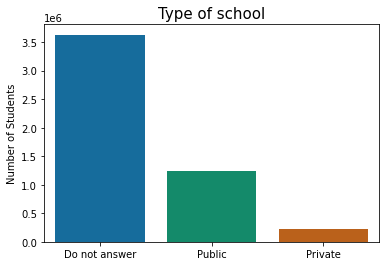

In [21]:
#Graphic: number of students and the type of school
sns.countplot(maindata['TP_ESCOLA'], orient='h')
plt.title('Type of school', size=15)
plt.xlabel("")
plt.ylabel("Number of Students")
plt.show()

In [22]:
#Percentage of students that do not have access to internet at home
print("Percentage of students that do not have access to internet at home")
maindata['Q025'].value_counts(normalize=True)

Percentage of students that do not have access to internet at home


Yes    0.776172
No     0.223828
Name: Q025, dtype: float64

In [23]:
#Number of students according to their mother's schooling
print("Number of students according to their mother's schooling:")
maindata['Q002'].value_counts()

Number of students according to their mother's schooling:


Did not complete college              1633692
Did not complete elementary school    1541024
Did not complete high school           667415
graduated                              513711
Post graduate                          399470
Never studied                          194625
Dont know                              145333
Name: Q002, dtype: int64

In [24]:
#Percenatage of mother's schooling
print("Percenatage according to mother's schooling")
maindata['Q002'].value_counts(normalize=True)

Percenatage according to mother's schooling


Did not complete college              0.320629
Did not complete elementary school    0.302442
Did not complete high school          0.130987
graduated                             0.100821
Post graduate                         0.078400
Never studied                         0.038197
Dont know                             0.028523
Name: Q002, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


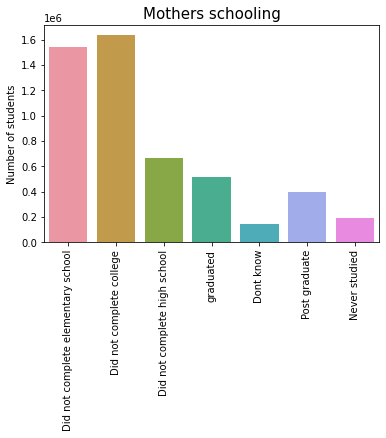

In [25]:
#Graphic: Mother's schooling X Number of students
sns.countplot(maindata['Q002'], orient='h')
plt.title('Mothers schooling', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Number of students")
plt.show()

In [26]:
#Percentage of students per household income
#The values are in reais
print('Percentage of students per household income:')
maindata['Q006'].value_counts(normalize=True)

Percentage of students per household income:


Until 1.320         0.507277
Until 3.520         0.295050
Until 10.560        0.122568
None                0.045547
More than 10.560    0.029558
Name: Q006, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


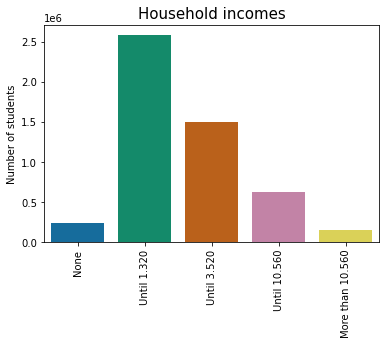

In [27]:
#Graphic: Household incomes
sns.countplot(maindata['Q006'], orient='h')
plt.title('Household incomes', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Number of students")
plt.show()

# Relation between qualitative variables

Subtitle:
Q025: Access to internet


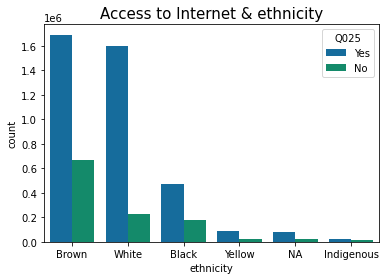

In [42]:
# Relation between access to internet and ethnicity
sns.countplot(x="TP_COR_RACA", hue="Q025", data=maindata)
plt.title('Access to Internet & ethnicity',size=15)
plt.xlabel("ethnicity")
print('Subtitle:\nQ025: Access to internet')

Subtitile:
Q025:Access to Internet


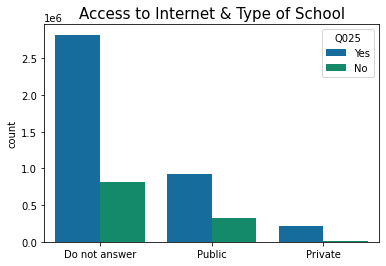

In [41]:
#Relation between access to internet and the type of school
sns.countplot(x="TP_ESCOLA", hue="Q025", data=maindata)
plt.title('Access to Internet & Type of School',size=15)
plt.xlabel("")
print('Subtitile:\nQ025:Access to Internet')

Subtitile:
Q025:Access to Internet


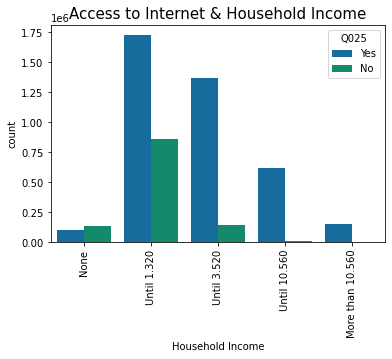

In [40]:
#Relation between access to internet and household income
sns.countplot(x="Q006", hue="Q025", data=maindata)
plt.xticks(rotation=90)
plt.title('Access to Internet & Household Income',size=15)
plt.xlabel("Household Income")
print('Subtitile:\nQ025:Access to Internet')

Text(0.5, 0, 'Household Income')

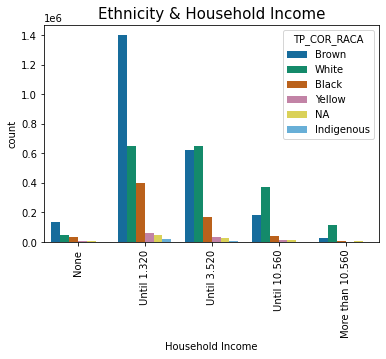

In [39]:
#Relation between ethnicity and household income
sns.countplot(x="Q006", hue="TP_COR_RACA", data=maindata)
plt.xticks(rotation=90)
plt.title('Ethnicity & Household Income',size=15)
plt.xlabel("Household Income")


Subtitle:
Q002:Mothers Schooling


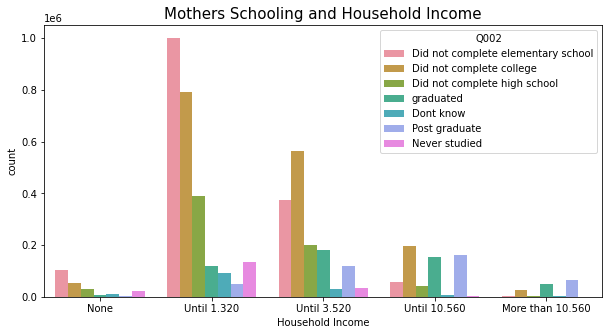

In [38]:
#Relation between mother's schooling and Household Income
plt.figure( figsize=(10, 5))
sns.countplot(x="Q006", hue="Q002", data=maindata)
plt.title('Mothers Schooling and Household Income',size=15)
plt.xlabel("Household Income")
print('Subtitle:\nQ002:Mothers Schooling')

Text(0.5, 0, 'State')

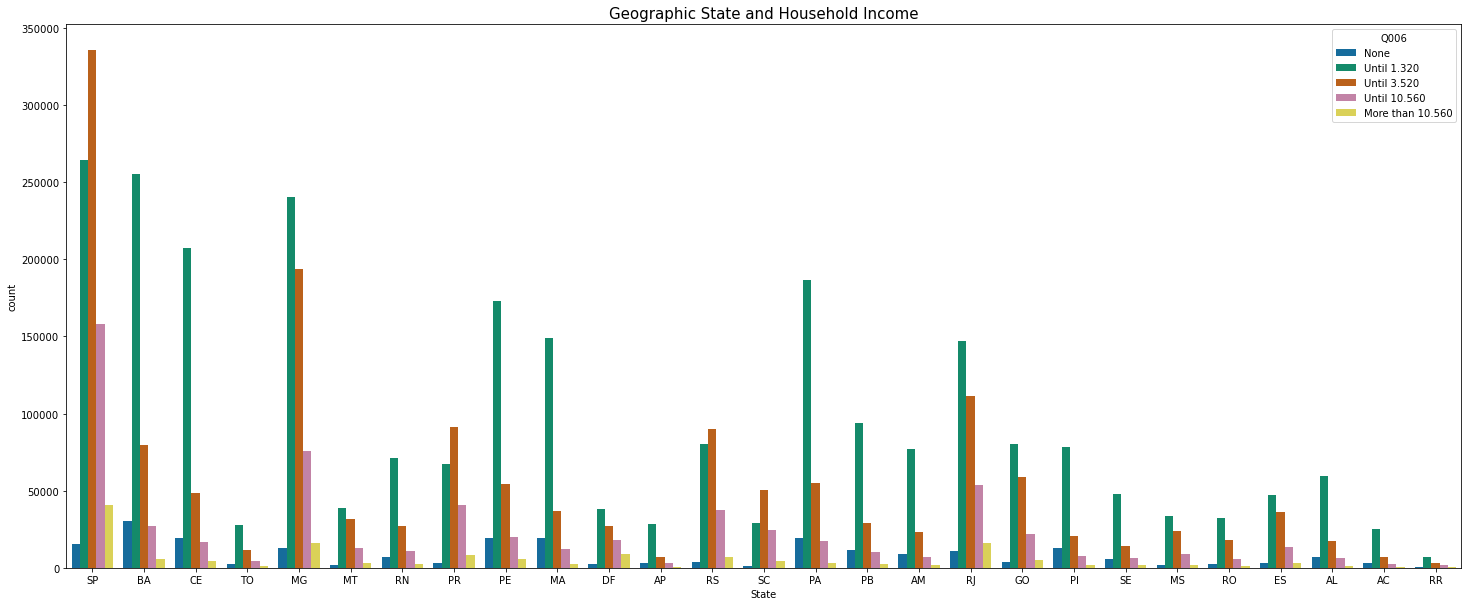

In [37]:
#Relation: geographic stae and household income
plt.figure( figsize=(25, 10))
sns.countplot(x="SG_UF_RESIDENCIA", hue="Q006", data=maindata)
plt.title('Geographic State and Household Income',size=15)
plt.xlabel("State")

Text(0.5, 0, 'Household Income')

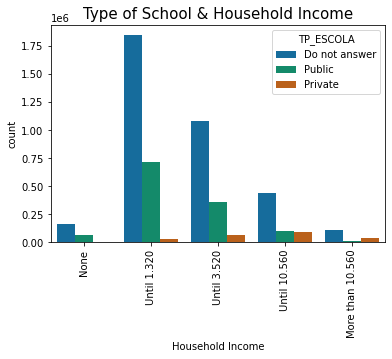

In [36]:
#Relation: Type of School and Household Income
sns.countplot(x="Q006", hue="TP_ESCOLA", data=maindata)
plt.title('Type of School & Household Income',size=15)
plt.xticks(rotation=90)
plt.xlabel("Household Income")

# Relation between qualitative and quantitative variables

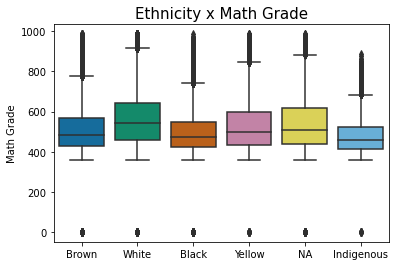

In [44]:
#Relation between Ethnicity and Math Grade
sns.boxplot(x=maindata['TP_COR_RACA'], y=maindata['NU_NOTA_MT'])
plt.title('Ethnicity x Math Grade',size=15)
plt.xlabel("")
plt.ylabel("Math Grade")
plt.show()

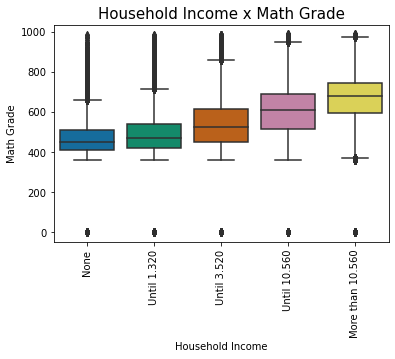

In [45]:
#Relation between Household Income and Math Grade
sns.boxplot(x=maindata['Q006'], y=maindata['NU_NOTA_MT'])
plt.title('Household Income x Math Grade',size=15)
plt.xticks(rotation=90)
plt.xlabel("Household Income")
plt.ylabel("Math Grade")
plt.show()

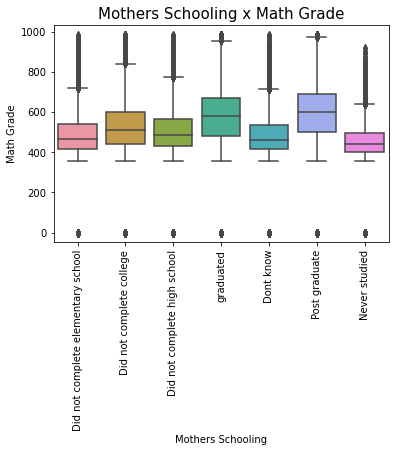

In [46]:
#Relation between Mothers Schooling and Math Grade
sns.boxplot(x=maindata['Q002'], y=maindata['NU_NOTA_MT'])
plt.title('Mothers Schooling x Math Grade',size=15)
plt.xticks(rotation=90)
plt.xlabel("Mothers Schooling")
plt.ylabel("Math Grade")
plt.show()

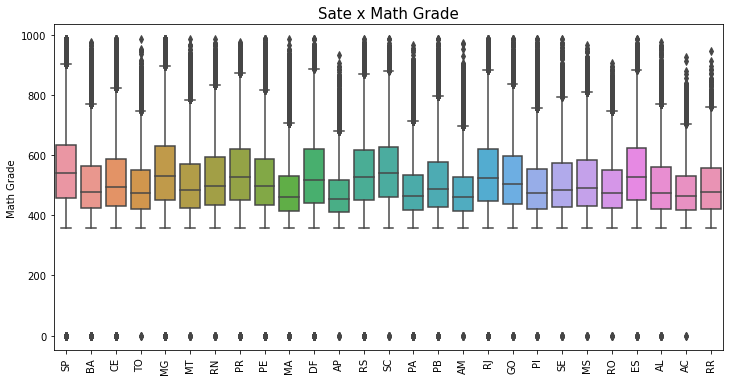

In [47]:
#Relation between Geographic State and Math Grade
plt.figure( figsize=(12, 6))
sns.boxplot(x=maindata['SG_UF_RESIDENCIA'], y=maindata['NU_NOTA_MT'])
plt.title('Sate x Math Grade',size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Math Grade")
plt.show()

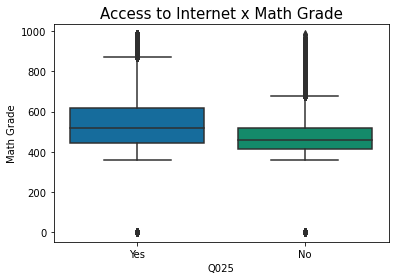

In [48]:
#Relation between Access to Internet and Math Grade
sns.boxplot(x=maindata['Q025'], y=maindata['NU_NOTA_MT'])
plt.title('Access to Internet x Math Grade',size=15)
plt.ylabel("Math Grade")
plt.show()

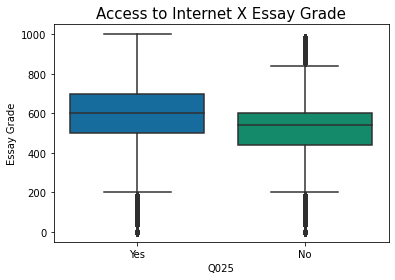

In [49]:
#Relation between Access to Internet and Essay Grade
sns.boxplot(x=maindata['Q025'], y=maindata['NU_NOTA_REDACAO'])
plt.title('Access to Internet X Essay Grade',size=15)
plt.ylabel("Essay Grade")
plt.show()

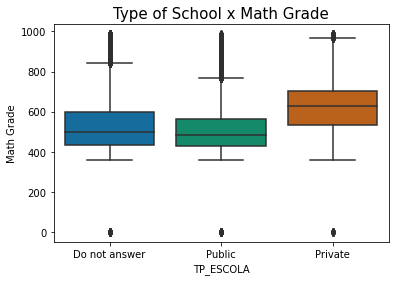

In [50]:
#Relation between Type of School and Math Grade
sns.boxplot(x=maindata['TP_ESCOLA'], y=maindata['NU_NOTA_MT'])
plt.title('Type of School x Math Grade',size=15)
plt.ylabel("Math Grade")
plt.show()

# Relation between quantitative variables

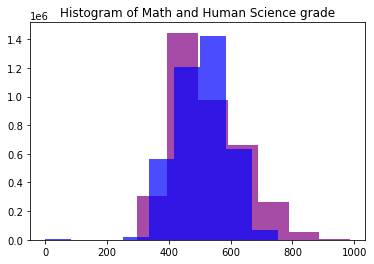

Subtitle:
 Math Grade: Purple
 Human Science Grade: Blue


In [57]:
# Histogram of Math and Human Science grades
plt.hist(maindata['NU_NOTA_MT'], alpha=0.7, color='purple')
plt.hist(maindata['NU_NOTA_CH'], alpha=0.7, color='blue')
plt.title('Histogram of Math and Human Science grade')
plt.show()
print('Subtitle:\n Math Grade: Purple\n Human Science Grade: Blue')

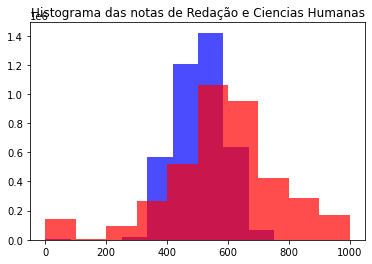

Subtitle:
 Essay Grade: Red
 Human Science Grade: Blue


In [56]:
#Histogram of Essay and Human Sciences Grades
plt.hist(maindata['NU_NOTA_CH'], alpha=0.7, color='blue')
plt.hist(maindata['NU_NOTA_REDACAO'], alpha=0.7, color='red')
plt.title('Histograma das notas de Redação e Ciencias Humanas')
plt.show()
print('Subtitle:\n Essay Grade: Red\n Human Science Grade: Blue')

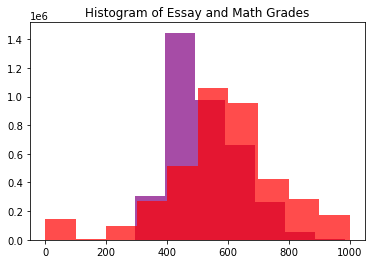

Subtitle:
 Essay Grade: Red
 Math Grade: Blue


In [55]:
#Histogram of Essay and Math Grades
plt.hist(maindata['NU_NOTA_MT'], alpha=0.7, color='purple')
plt.hist(maindata['NU_NOTA_REDACAO'], alpha=0.7, color='red')
plt.title('Histogram of Essay and Math Grades')
plt.show()
print('Subtitle:\n Essay Grade: Red\n Math Grade: Blue')

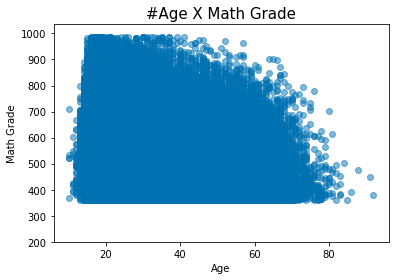

In [58]:
#Age X Math grade
plt.scatter(maindata['NU_IDADE'], maindata['NU_NOTA_MT'], alpha=0.5)
plt.title("#Age X Math Grade", size=15)
plt.xlabel("Age")
plt.ylabel("Math Grade")
plt.ylim(200) #removing grades = 0
plt.show()

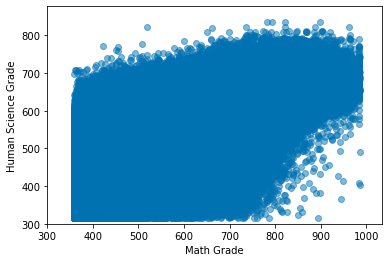

In [59]:
plt.scatter(maindata['NU_NOTA_MT'], maindata['NU_NOTA_CH'], alpha=0.5)
plt.xlim(300) #removing grades = 0
plt.ylim(300) #removing grades = 0
plt.xlabel("Math Grade")
plt.ylabel("Human Science Grade")
plt.show()

# Analysis best ENEM math scores

In [61]:
#Students that achieve grades over 800 in math
melhoresNotas = maindata.loc[maindata['NU_NOTA_MT']>800]

In [64]:
len(melhoresNotas)
print(str(len(melhoresNotas)) + ' students achieve grade over than 800 points')

46990 students achieve grade over than 800 points


In [66]:
#Percentage of grade higher than 800 points per ethnicity
print('Percentage of grade higher than 800 points per ethnicity')
melhoresNotas['TP_COR_RACA'].value_counts(normalize=True)

Percentage of grade higher than 800 points per ethnicity


White         0.684337
Brown         0.221771
Yellow        0.035731
NA            0.032071
Black         0.025495
Indigenous    0.000596
Name: TP_COR_RACA, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


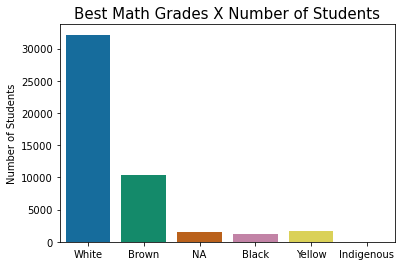

In [67]:
#Graphic: Best Math Grades X Number of Students
sns.countplot(melhoresNotas['TP_COR_RACA'], orient='h')
plt.title('Best Math Grades X Number of Students', size=15)
plt.xlabel("")
plt.ylabel("Number of Students")
plt.show()

In [68]:
#Pecentage of best maths grades according to mother's schooling
print('Pecentage of best maths grades according to mothers schooling')
melhoresNotas['Q002'].value_counts(normalize=True)

Pecentage of best maths grades according to mothers schooling


Post graduate                         0.336157
graduated                             0.330517
Did not complete college              0.242818
Did not complete high school          0.040924
Did not complete elementary school    0.039732
Dont know                             0.008491
Never studied                         0.001362
Name: Q002, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


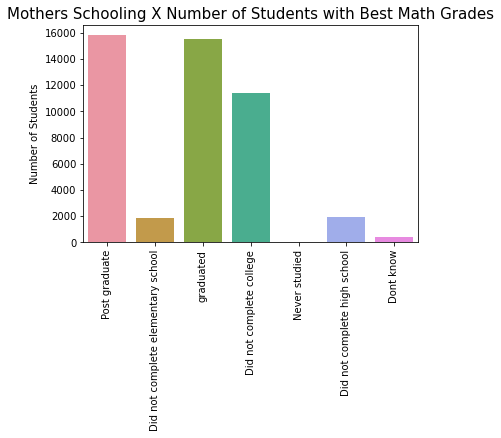

In [69]:
#Grafico Escolaridade da Mãe das Melhores Notas de Matemática
#Graphic: Mother's Schooling X Number of Students with Best Math Grades
sns.countplot(melhoresNotas['Q002'], orient='h')
plt.title('Mothers Schooling X Number of Students with Best Math Grades', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Number of Students")
plt.show()

In [72]:
#Percentage of students with the best math grades according to gender
print('Percentage of students with the best math grades according to gender')
melhoresNotas['TP_SEXO'].value_counts(normalize=True)

Percentage of students with the best math grades according to gender


M    0.66578
F    0.33422
Name: TP_SEXO, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


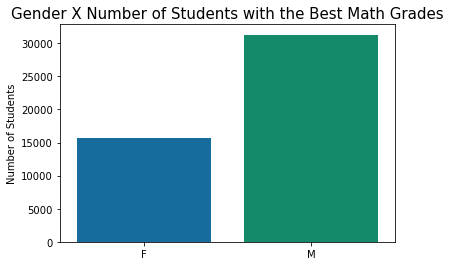

In [73]:
#Graphic: Gender X Number of Students with the Best Math Grades
sns.countplot(melhoresNotas['TP_SEXO'], orient='h')
plt.title('Gender X Number of Students with the Best Math Grades', size=15)
plt.xlabel("")
plt.ylabel("Number of Students")
plt.show()

In [74]:
#Pecentage of students with the best math grades according to household incomes
print('Pecentage of students with the best math grades according to household incomes:')
melhoresNotas['Q006'].value_counts(normalize=True)

Pecentage of students with the best math grades according to household incomes:


Until 10.560        0.435582
More than 10.560    0.294041
Until 3.520         0.207682
Until 1.320         0.057651
None                0.005044
Name: Q006, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


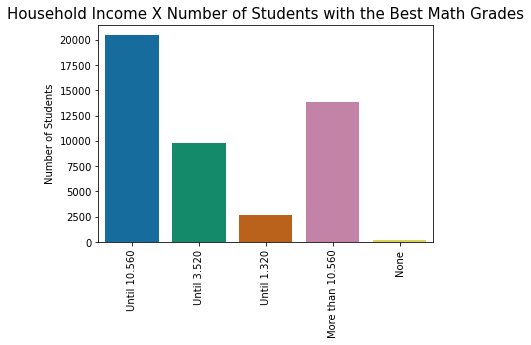

In [75]:
#Graphic: Household Income X Number of Students with the Best Math Grades
sns.countplot(melhoresNotas['Q006'], orient='h')
plt.title('Household Income X Number of Students with the Best Math Grades', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Number of Students")
plt.show()

In [76]:
#Percentage of students with the best math grades according wirh access to internet
print('Percentage of students with the best math grades according wirh access to internet:')
melhoresNotas['Q025'].value_counts(normalize=True)

Percentage of students with the best math grades according wirh access to internet:


Yes    0.982401
No     0.017599
Name: Q025, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


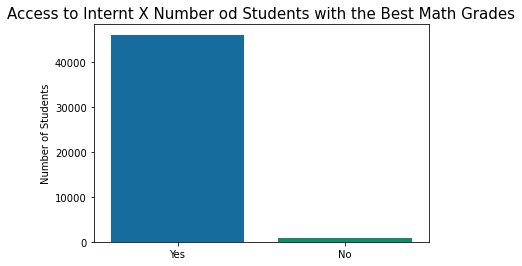

In [77]:
#Graphic: Access to Internt X Number od Students with the Best Math Grades
sns.countplot(melhoresNotas['Q025'], orient='h')
plt.title('Access to Internt X Number od Students with the Best Math Grades', size=15)
plt.xlabel("")
plt.ylabel("Number of Students")
plt.show()